# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>

## Download: http://github.com/dsacademybr

# Scikit-learn

In [ ]:
from IPython.display import Image
Image('ml_map.png')

### Prevendo o Preço da Pizza

### Suponha que você queira prever o preço da pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com sckit-learn, que prevê o preço da pizza dado seu tamanho. 


### <font color='blue'>O conjunto de técnicas de regressão é muito provavelmente um dos mais simples modelos utilizados em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.</font>

### <font color='red'>É de fundamental importância que o pesquisador seja bastante cuidadoso e criterioso ao interpretar os resultados de uma modelagem de regressão. A existência de um modelo de regressão não significa que ocorra, obrigatoriamente, relação de causa e efeito entre as variáveis consideradas.</font>

In [ ]:
# Importando Matplotlib e Numpy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com a sua família.

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Instância</strong></td>
			<td><strong>Diâmetro(cm)</strong></td>
            <td><strong>Preço(R$)</strong></td>
		</tr>
		<tr>
			<td><code>1</code></td>
			<td>7</td>
            <td>8</td>
		</tr>
		<tr>
			<td><code>2</code></td>
			<td>10</td>
            <td>11</td>
		</tr>
		<tr>
			<td><code>3</code></td>
			<td>15</td>
            <td>16</td>
		</tr>
		<tr>
			<td><code>4</code></td>
			<td>30</td>
            <td>38.5</td>
		</tr>
		<tr>
			<td><code>5</code></td>
			<td>45</td>
            <td>52</td>
		</tr>
	</tbody>
</table>

In [ ]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]

### Vamos visualizar estes dados construindo um plot

In [ ]:
plt.figure()
plt.xlabel('Diâmetro(cm)')
plt.ylabel('Preço(R$)')
plt.title('Diâmetro x Preço')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

### Pelo gráfico podemos ver que existe uma relação positiva entre diâmetro da pizza e seu preço (o que é confirmado pela experiência de comer a pizza com sua família). À medida que o diâmetro da pizza aumenta, geralmente aumenta também o preço da pizza.


### Vamos agora modelar o relacionamento usando regressão linear e criar um modelo para prever o preço da Pizza.


### A classe sklearn.linear_model.LinearRegression é um estimador. Um estimador prevê um valor baseado em dados observados. Em scikit-learn, todos os estimadores implementam os métodos fit() e predict(). O método fit() é usado para aprender os parâmetros de um modelo e o método predict() é usado para prever o valor de uma variável dependente em relação a uma variável explanatória usando os parâmetros aprendidos.


In [ ]:
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da Pizza.
X = [[7], [10], [15], [30], [45]]

# Vamos chamar de Y os dados de preço da Pizza.
Y = [[8], [11], [16], [38.5], [52]]

In [ ]:
# Criando o modelo
modelo = LinearRegression()

In [ ]:
type(modelo)

In [ ]:
# Treinando o modelo
modelo.fit(X, Y)

In [ ]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro
print("Uma pizza de 20 cm de diâmetro deve custar: R$%.2f" % modelo.predict([20][0]))

### O método fit() do módulo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples:


In [ ]:
from IPython.display import Image
Image('linear.png')

### Y – é o valor previsto da variável dependente (em nosso exemplo o preço da Pizza)
### X – é a variável explanatória (em nosso exemplo o diâmetro da Pizza)
### Alfa é o termo de intercepção ou coeficiente linear
### Beta é o coeficiente de cada variável ou coeficiente angular


## Alfa e Beta são parâmetros do modelo que são aprendidos pelo algoritmo de aprendizagem.


# Construindo um Scatter Plot

In [ ]:
# Coeficientes
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(X) - Y) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(X, Y))

In [ ]:
# Scatter Plot representando a regressão linear
plt.scatter(X, Y,  color = 'black')
plt.plot(X, modelo.predict(X), color = 'green', linewidth = 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.show()

# Explorando o Dataset Boston Housing

#### Dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [1]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Verificando o tipo da variável boston
type(boston)

sklearn.utils.Bunch

In [4]:
# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506, 13)

In [5]:
# Descrição do Dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# boston.target é uma array com o preço das casas 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Prevendo o Preço das Casas em Boston

### Y - variável dependente (preço das casas em Boston)
### X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)

In [16]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [17]:
# Não queremos o preço da casa como variável dependente
X = df.drop('PRICE', axis = 1)

In [18]:
# Definindo Y
Y = df.PRICE

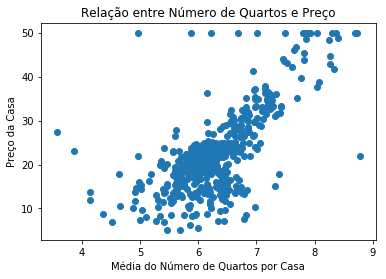

In [19]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

In [20]:
# Criando o objeto de regressão linear
regr = LinearRegression()

In [21]:
# Tipo do objeto
type(regr)

sklearn.linear_model.base.LinearRegression

In [22]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficientes: ", len(regr.coef_))

Coeficiente:  36.49110328036135
Número de Coeficientes:  13


In [24]:
# Prevendo o preço da casa
regr.predict(X)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

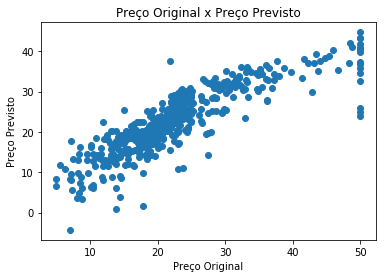

In [25]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço Original")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

### Podemos ver que existem alguns erros na predição do preço das casas

In [26]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.897779217687496


In [27]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.65220001376927


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.

### Na prática, você não vai implementar regressão linear em todo o dataset. Você vai dividir o dataset em datasets de treino e de teste. Assim, você treina seu modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste. Vejamos:

In [28]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(456, 13) (50, 13) (456,) (50,)


### Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. Vamos então dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [29]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [ ]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

In [ ]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [ ]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

In [ ]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

In [ ]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>